## Extract All Data Points for a Device

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
CELLS_DIR = '../sky130_fd_pr/cells'
dut_type = 'nfet_01v8'
dut_tag = 'sky130_fd_pr__'+dut_type
fdir = CELLS_DIR+'/'+dut_type
flist0 = os.listdir(fdir)
flist_mdm = []

dut_sel = {'w':'1u', 'l':'0p15u', 'm':'1'}
for fn in flist0:
    if fn.endswith('.mdm'):
        flist_mdm.append(fn)
print(dut_tag)
print('{:d} mdm files'.format(len(flist_mdm)))

sky130_fd_pr__nfet_01v8
110 mdm files


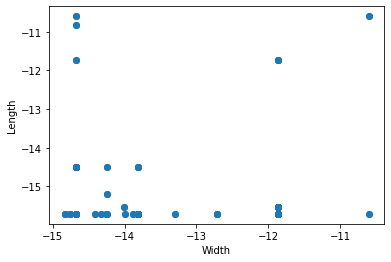

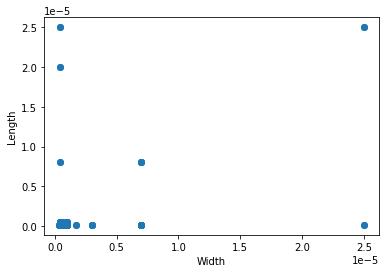

In [3]:
wllist = []
wllist_log = []
for fn in flist_mdm:
    fn0 = fn.split('.')[0]
    test_type = fn0.split('(')[1][:-1]
    dut_name  = fn0.split('(')[0]
    parts = dut_name.split('_')
    w  = None  # Must be in the file name
    l  = None  # Must be in the file name
    nf = 1     # Ignored by default
    m  = 1     # Should be there as well
    #print(dut_name)
    for e in parts:
        if len(e)>0:
            if e[0]=='w':
                # Width
                e = e.replace('p','.').replace('u','e-6')
                w = float(e[1:])

            if e[0]=='l':
                # Length
                e = e.replace('p','.').replace('u','e-6')
                l = float(e[1:])

            if e.startswith('m'):
                # Multiplier
                # Note that this parameter should be an integer
                m = int(e[1:])
    if (w==None) or (l==None):
        print('Error: Unknown Device Size, Excluded: '+fn0)
    else:
        # print('Device: W={}, L={}, M={}'.format(w,l,m))
        
        # Exclude m!=1
        #if m==1:
        if True:
            # Exclude large devices
            wllist.append((w,l))
            wllist_log.append((np.log(w),np.log(l)))
            
            
# Sort by Width
wllist_ws = sorted(wllist, key=lambda element: (element[0], element[1]))
# Sort by Length
wllist_ls = sorted(wllist, key=lambda element: (element[1], element[0]))

plt.scatter(*zip(*wllist_log))
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

plt.scatter(*zip(*wllist))
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()  

3.600E-07: 3
3.900E-07: 3
4.200E-07: 17
5.500E-07: 1
6.000E-07: 1
6.400E-07: 1
6.500E-07: 1
8.400E-07: 1
9.400E-07: 1
1.000E-06: 11
1.680E-06: 1
3.000E-06: 3
7.000E-06: 9
2.500E-05: 1


Text(0.5, 0, '#')

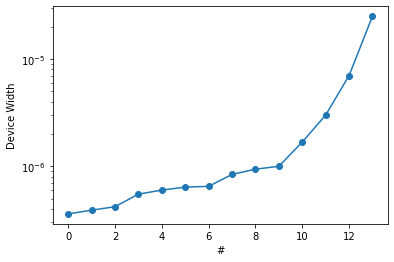

In [4]:
wlist = {}
for e in wllist_ls:
    if e[1]==1.5e-7:
        if e[0] in wlist:
            wlist[e[0]] += 1
        else:
            wlist[e[0]] = 0
for e in wlist.keys():
    print('{:.3E}: {}'.format(e,wlist[e]))
plt.semilogy(list(wlist.keys())[:],'-o')
plt.ylabel('Device Width')
plt.xlabel('#')

In [5]:
def get_wl_group(wt,lt:float=None,mt:int=1, debug=False):
    # Accepts (W,L) tuple as an input
    if lt==None:
        lt = wt[1]
        wt = wt[0]
    
    flist_out = []
    for fn in flist_mdm:
        fn_wlm = fn[len(dut_tag)+1:-4].split('(')[0].split('_')
        fn_run = fn[len(dut_tag)+1:-4].split('(')[1][:-1]
        w = None
        l = None
        m = 1
        for e in fn_wlm:
            if len(e)>0:
                if e[0]=='w':
                    # Width
                    e = e.replace('p','.').replace('u','e-6')
                    w = float(e[1:])

                if e[0]=='l':
                    # Length
                    e = e.replace('p','.').replace('u','e-6')
                    l = float(e[1:])

                if e.startswith('m'):
                    # Multiplier
                    # Note that this parameter should be an integer
                    m = int(e[1:])
        if(w == wt) and (l == lt) and (m == mt):
            if(debug):
                print(w,l,m,fn_run)
            flist_out.append(fn)
    return flist_out

In [6]:
get_wl_group((7e-06, 1.8e-07))

['sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_5_6_IDVD).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_4_5_IDVG).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_7_8_IDVG).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_3_4_IDVG).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_7_8_IDVD).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_3_4_IDVD).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_5_6_IDVG).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_6_7_IDVG).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_4_5_IDVD).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_8_9_IDVG).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_8_9_IDVD).mdm',
 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_6_7_IDVD).mdm']

In [7]:
import DMT.core
import pandas as pd
preamble='\\usepackage{amsmath}\n\\usepackage{amsfonts}'
plt.rc('text',usetex=True)
plt.rc('text.latex',preamble=preamble)

/usr/lib/python3/dist-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


-----------------------------------------------------------------------
DMT Copyright (C) 2022 SemiMod
This program comes with ABSOLUTELY NO WARRANTY.
DMT_core is free software, and you are welcome to redistribute it.
-----------------------------------------------------------------------


In [20]:
# Put all I/V data of a given device (W/L) into one large data frame
key = 'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1'
meas = DMT.core.DutMeas(
    database_dir = None,
    dut_type = DMT.core.DutType.device,
    name = key,
    reference_node = 'E')

first_run = True
df0 = None
for fn in get_wl_group((7e-06, 1.8e-07)):
    meas.add_data(fdir+'/'+fn, key=fn)
    if first_run == True:
        df0 = meas.data[fn]
        first_run = False
    else:
        df0 = pd.concat([df0,meas.data[fn]])

# Extract (VGS,VDS) -> IDS
gb = df0.groupby(['VB'])
a = gb.get_group((0.0)).drop(['VB','VS','IB','IG'], axis=1).sort_values(by=['VD','VG']).reset_index()
agb = a.groupby(['VD','VG','ID'])
vd_list  = []
vg_list  = []
ids_list = []
for g in agb.groups:
    vd_list.append(g[0])
    vg_list.append(g[1])
    ids_list.append(g[2])


In [21]:
a = zip(*vdvg_list)

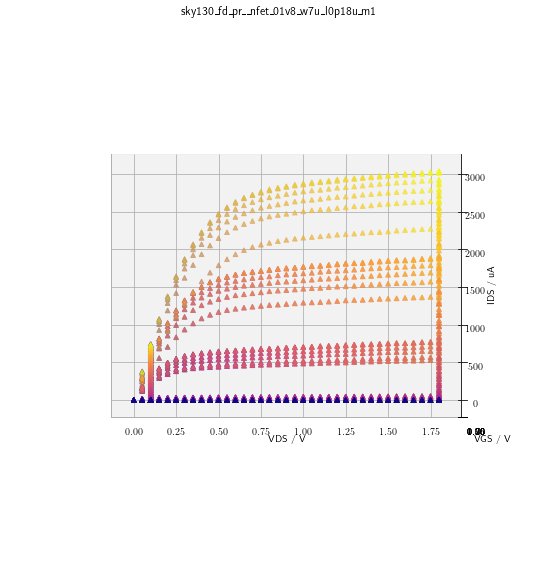

In [47]:

# Show (VGS, VDS) Coverage
my_cmap = plt.get_cmap('plasma')
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ids_list_uA = list(e*1e6 for e in ids_list)
sctt3d = ax.scatter3D(vd_list, vg_list, ids_list_uA, c=ids_list, cmap = my_cmap, marker ='^')
ax.set_xlabel('VDS / V')
ax.set_ylabel('VGS / V')
ax.set_zlabel('IDS / uA')
ax.set_title(key)
ax.set_proj_type('ortho')
ax.view_init(45, -45)
plt.savefig(key+'_IDS_v_VGS_VDS.svg')

sctt3d_vg = ax.scatter3D(vd_list, vg_list, ids_list_uA, c=vd_list, cmap = my_cmap, marker ='^')
ax.view_init(0, 0)
plt.savefig(key+'_IDS_v_VGS.svg')

sctt3d_vd = ax.scatter3D(vd_list, vg_list, ids_list_uA, c=vg_list, cmap = my_cmap, marker ='^')
ax.view_init(0, -90)
plt.savefig(key+'_IDS_v_VDS.svg')
